En este notebook encontrarán los pasos e instrucciones necesarias para realizar la exploración de los datos.

In [1]:
# Importar librerías de python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
# Importar el dataset y crear dataframe
df_platforms = pd.read_csv("df_platforms.csv")
df_score = pd.read_csv("df_score.csv")

### Platforms

In [22]:
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           22998 non-null  object 
 1   title          22998 non-null  object 
 2   director       14739 non-null  object 
 3   cast           17677 non-null  object 
 4   country        11499 non-null  object 
 5   release_year   22998 non-null  int64  
 6   listed_in      22998 non-null  object 
 7   description    22994 non-null  object 
 8   id             22998 non-null  object 
 9   platform       22998 non-null  object 
 10  duration_int   22811 non-null  float64
 11  duration_type  22811 non-null  object 
 12  average_score  22998 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [23]:
df_platforms["duration_int"] = df_platforms["duration_int"].astype("Int64")

In [24]:
# Visualizar el dataframe 
df_platforms.head(2)

,type,title,director,cast,country,release_year,listed_in,description,id,platform,duration_int,duration_type,average_score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2014,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113,min,3.47
1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2018,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110,min,3.55


In [25]:
# Descripción de la forma o dimensión del dataset
print(f"Hay {df_platforms.shape[0]} filas y {df_platforms.shape[1]} columnas")

Hay 22998 filas y 13 columnas


In [26]:
#Descripción de columnas numéricas
df_platforms.describe()

,release_year,duration_int,average_score
count,22998.000000,22811.0,22998.000000
mean,2010.811244,67.159353,3.533446
std,15.401142,51.274305,0.048628
min,1920.000000,0.0,3.340000
25%,2010.000000,3.0,3.500000
50%,2016.000000,85.0,3.530000
75%,2019.000000,102.0,3.570000
max,2021.000000,601.0,3.720000


In [27]:
#Descripción de columnas categóricas
df_platforms.describe(exclude = "number")

,type,title,director,cast,country,listed_in,description,id,platform,duration_type
count,22998,22998,14739,17677,11499,22998,22994,22998,22998,22811
unique,2,22042,10095,16744,886,1687,22669,22998,4,2
top,movie,married at first sight,mark knight,maggie binkley,united states,drama,"arpo was designed as a commando robot, built a...",as1,amazon,min
freq,16481,4,113,56,4997,1061,15,1,9668,16232


In [28]:
# Verificar si hay valores duplicados
df_platforms.duplicated().sum()

0

In [29]:
df_platforms.isnull().sum()

type                 0
title                0
director          8259
cast              5321
country          11499
release_year         0
listed_in            0
description          4
id                   0
platform             0
duration_int       187
duration_type      187
average_score        0
dtype: int64

<AxesSubplot: >

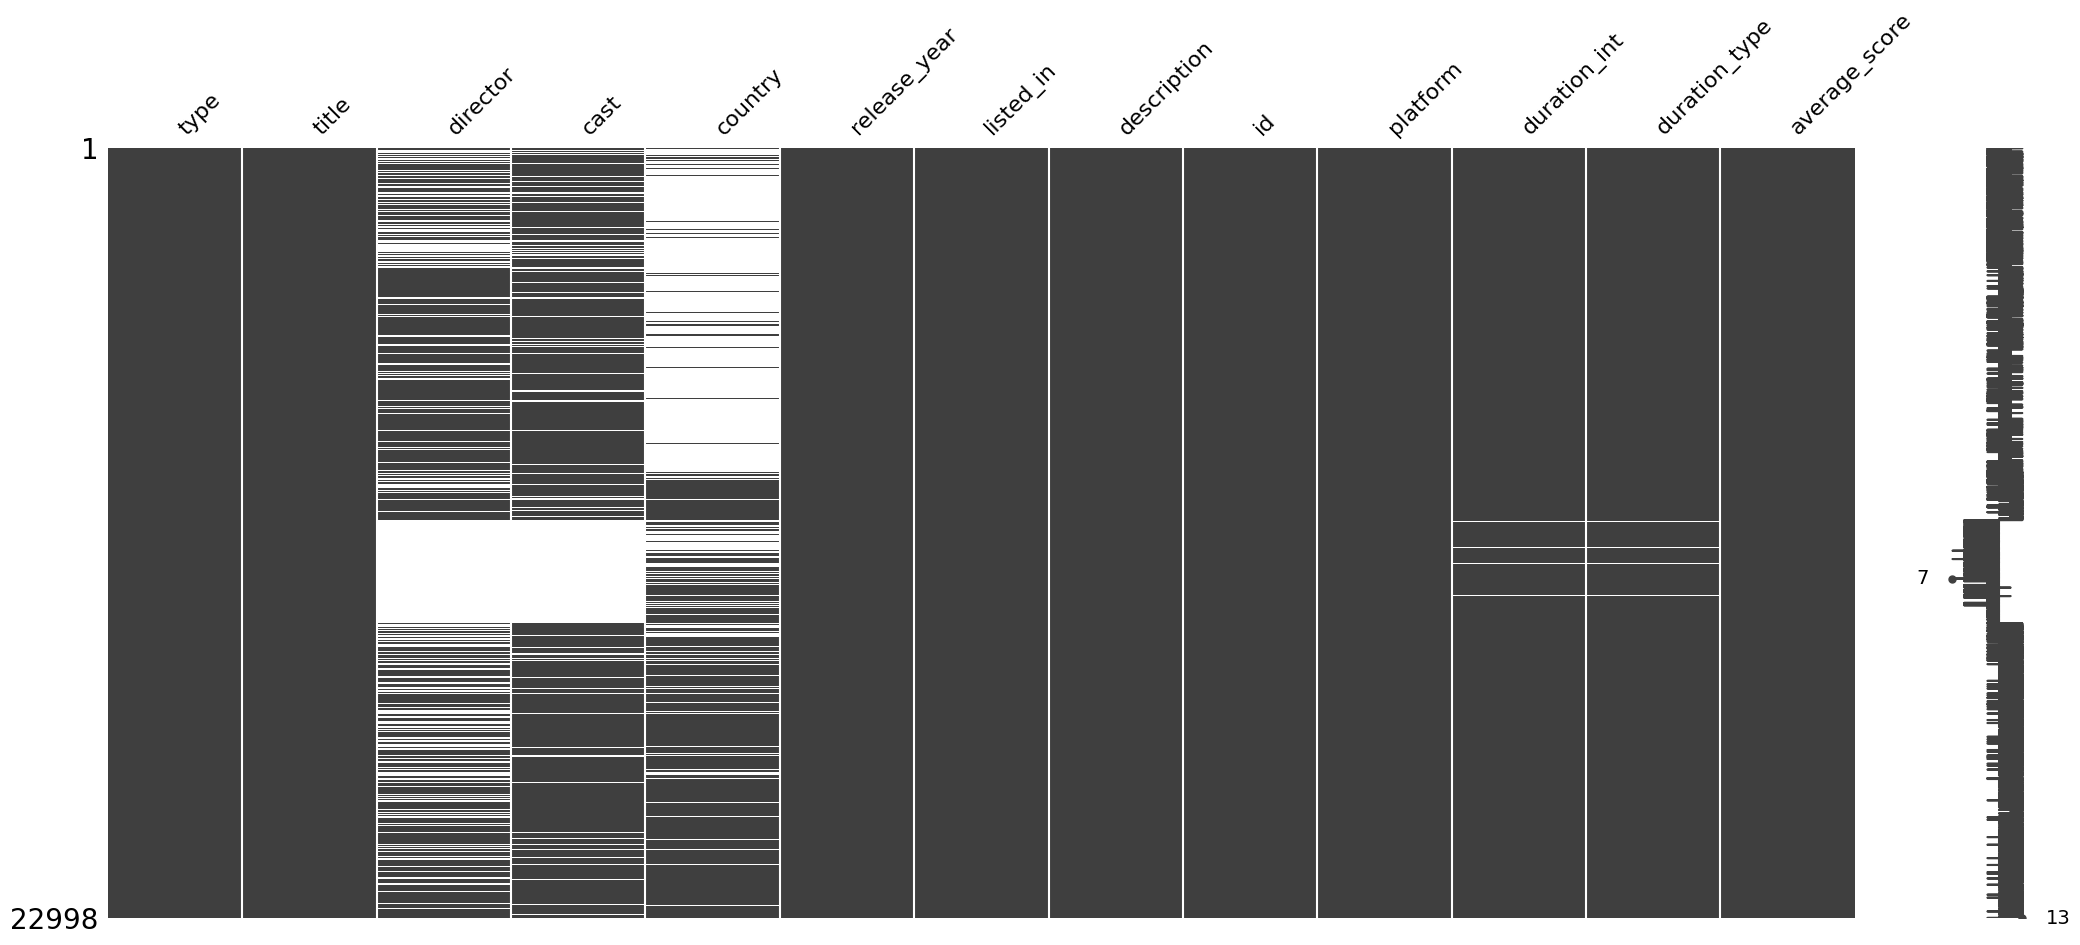

In [30]:
# Los espacios en blanco son los datos faltantes
import missingno as msno
msno.matrix(df_platforms)

<AxesSubplot: >

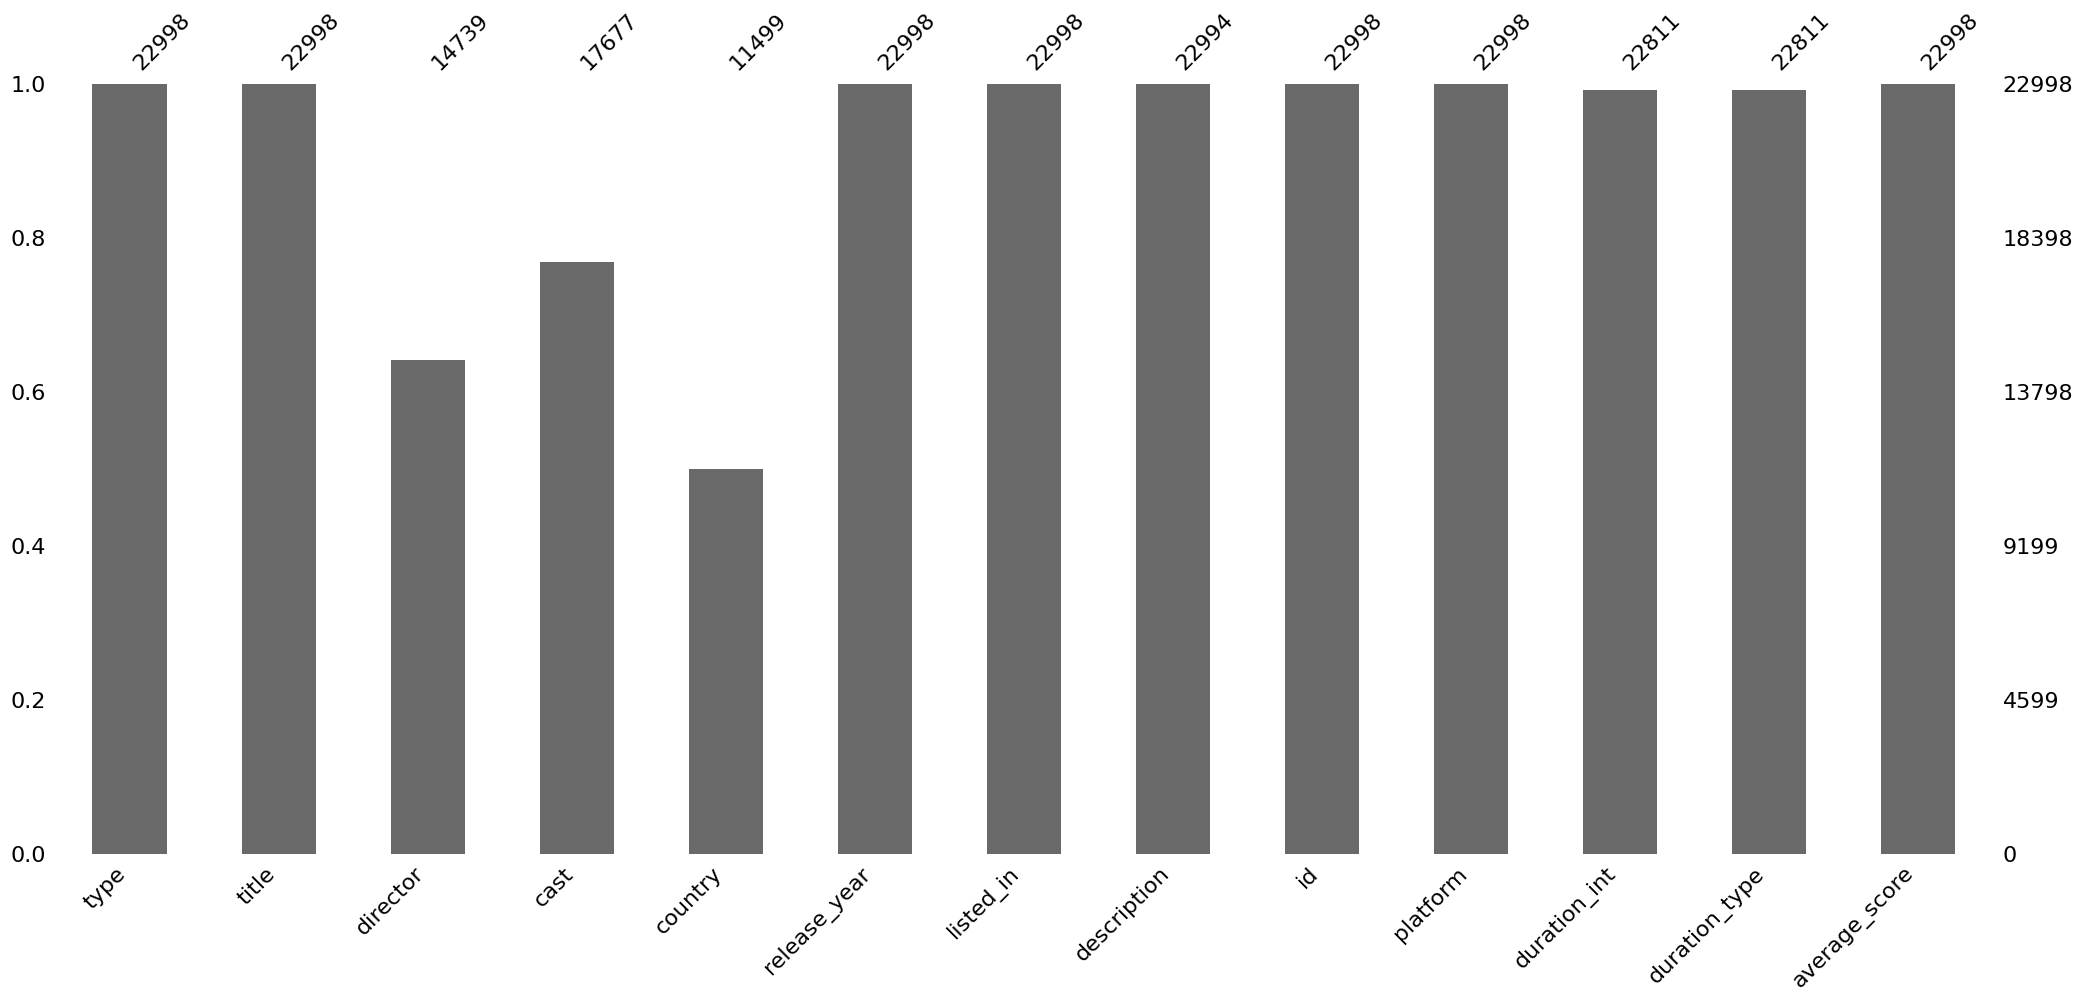

In [31]:
msno.bar(df_platforms)

### *Conclusiones plataformas*
Columnas con valores faltantes:
+ country
+ director
+ cast
+ duration_int    
+ duration_type

No hay filas duplicadas

In [34]:
df_platforms.head(2)

,type,title,director,cast,country,release_year,listed_in,description,id,platform,duration_int,duration_type,average_score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2014,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113,min,3.47
1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2018,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110,min,3.55


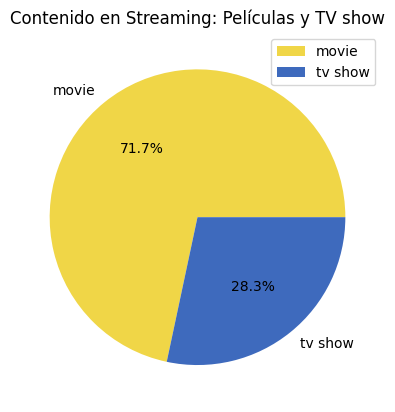

In [71]:
# Contar los valores en la columna 'type'
count = df_platforms['type'].value_counts()

# Crear un gráfico de pie chart
plt.pie(count, labels=count.index, colors=['#f0d647', '#3e6abd'], autopct='%1.1f%%')

plt.title('Contenido en Streaming: Películas y TV show')
plt.legend(labels=count.index, loc='upper right')
plt.show()


In [6]:
# Calcular la cantidad de películas por país en cada año
count_df = df_platforms.groupby(['release_year', 'country'])['title'].count().reset_index().rename(columns={'title': 'num_movies'})

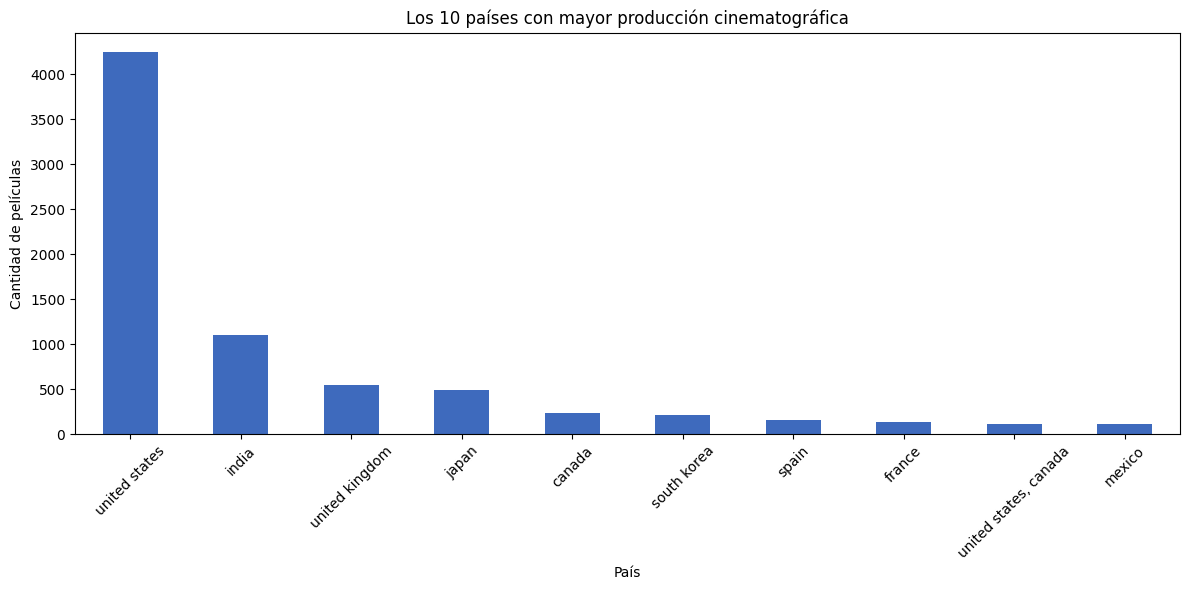

In [7]:
# Filtrar los datos para incluir solo los años a partir de 2000
count_df_filtrado = count_df[count_df['release_year'] >= 2000]

# Calcular la cantidad total de películas por país en los años seleccionados
total_peliculas_por_pais = count_df_filtrado.groupby('country')['num_movies'].sum()

# Seleccionar los 10 países con la mayor cantidad de películas
top_10_paises = total_peliculas_por_pais.nlargest(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='#3e6abd')

plt.title('Los 10 países con mayor producción cinematográfica')
plt.xlabel('País')
plt.ylabel('Cantidad de películas')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Seleccionar los 10 países con la mayor cantidad de películas
top_10_paises = total_peliculas_por_pais.nlargest(10).index

# Filtrar el DataFrame para incluir solo los datos de los 10 países principales
df_top_10_paises = count_df_filtrado[count_df_filtrado['country'].isin(top_10_paises)]

# Crear el gráfico interactivo de tendencia con Plotly
fig = px.line(df_top_10_paises, x='release_year', y='num_movies', color='country', labels={'num_movies': 'Cantidad de Películas'})
fig.update_layout(
    title='Países con mayor producción cinematográfica (desde 2000)',
    xaxis_title='Año',
    yaxis_title='Cantidad de Películas'
)

fig.show()

<p align="center">
  <img src="src/newplot.png">
</p>